## Importando bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from scipy.stats import ttest_ind

## Carregando os dados do arquivo CSV e exibindo as informações sobre o DataFrame

In [2]:
df = pd.read_csv("sea_levels.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608 entries, 0 to 1607
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time              1608 non-null   object 
 1   GMSL              1608 non-null   float64
 2   GMSL uncertainty  1608 non-null   float64
dtypes: float64(2), object(1)
memory usage: 37.8+ KB
None


## Conversão da coluna 'Time' para o formato de data

In [3]:
df['Time'] = pd.to_datetime(df['Time'])

## Calculando a Média Móvel de 12 meses para suavizar flutuações sazonais

In [4]:
trend = df['GMSL'].rolling(window=12).mean()
df['GMSL_uncertainty_smoothed'] = df['GMSL uncertainty'].rolling(window=12).mean()

## Gráfico de Variação do Nível Médio Global do Mar

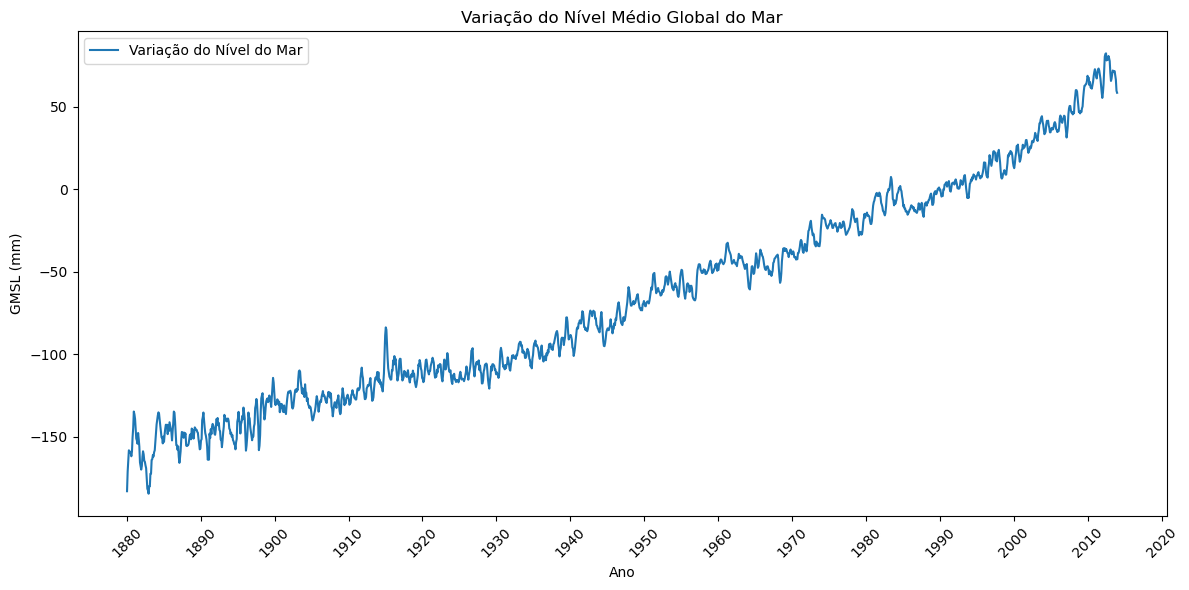

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df['GMSL'])
plt.xlabel('Ano')
plt.ylabel('GMSL (mm)')
plt.title('Variação do Nível Médio Global do Mar')
plt.legend(['Variação do Nível do Mar'])
plt.gca().xaxis.set_major_locator(mdates.YearLocator(10))  # Exibir rótulos de data a cada 10 anos
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato dos rótulos de data
plt.xticks(rotation=45)
plt.tight_layout()

## Gráfico para identificar a sua Tendência

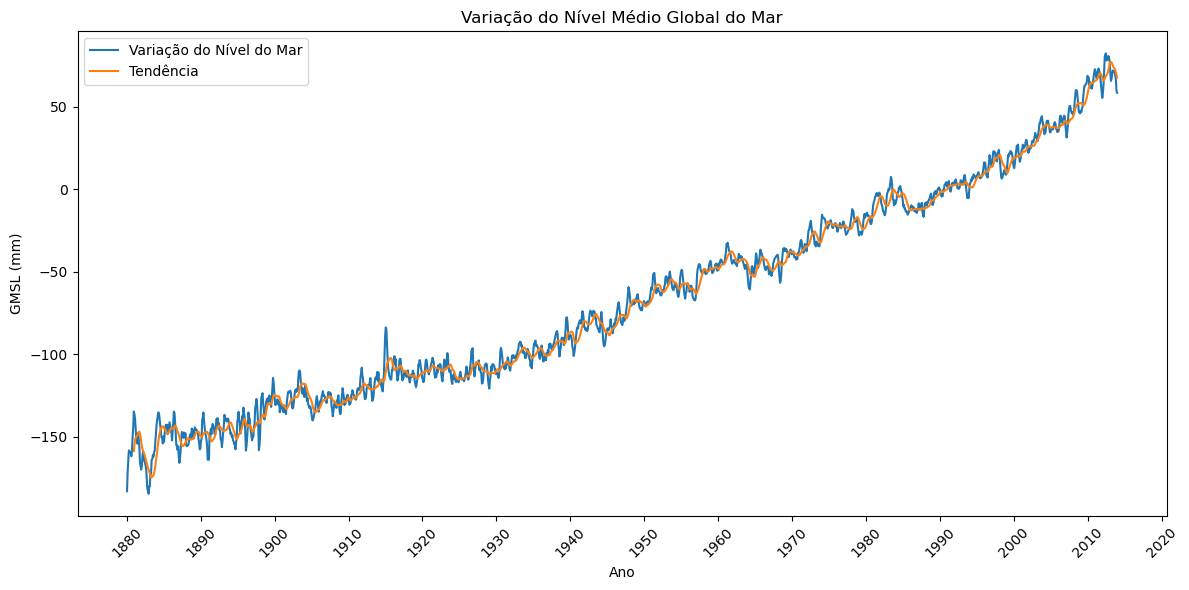

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df['GMSL'], label='Variação do Nível do Mar')
plt.plot(df['Time'], trend, label='Tendência')
plt.xlabel('Ano')
plt.ylabel('GMSL (mm)')
plt.title('Variação do Nível Médio Global do Mar')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.YearLocator(10))  # Exibir rótulos de data a cada 10 anos
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato dos rótulos de data
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Gráfico para explorar a Incerteza das Medições

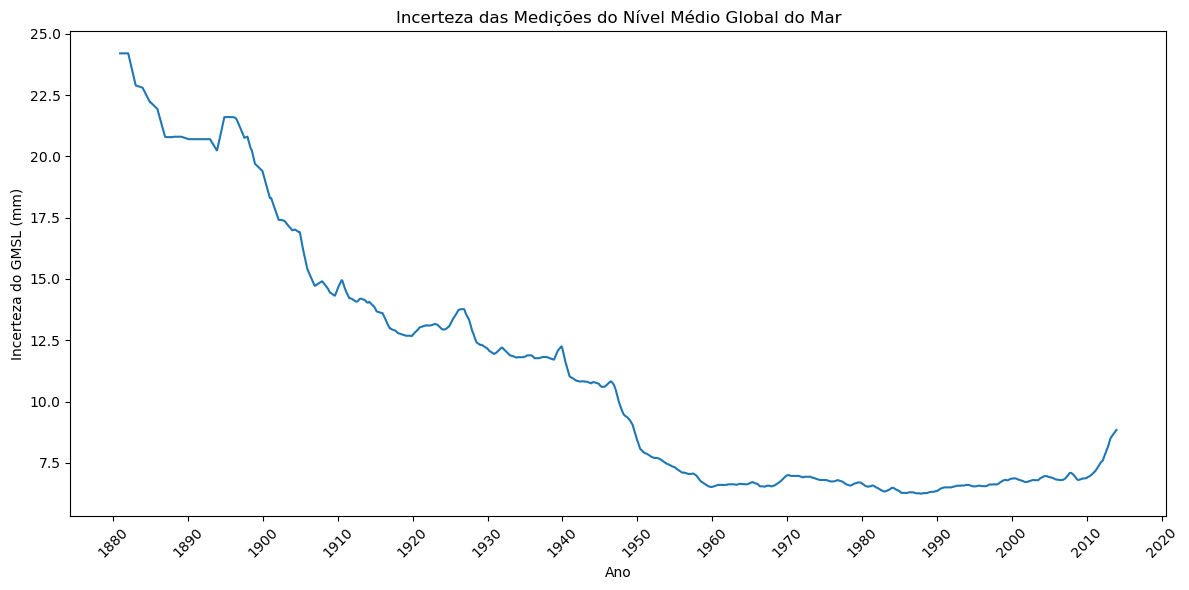

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df['GMSL_uncertainty_smoothed'])
plt.xlabel('Ano')
plt.ylabel('Incerteza do GMSL (mm)')
plt.title('Incerteza das Medições do Nível Médio Global do Mar')
plt.gca().xaxis.set_major_locator(mdates.YearLocator(10))  # Exibir rótulos de data a cada 10 anos
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato dos rótulos de data
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Estatísticas Descritivas

In [8]:
stats = df[['GMSL', 'GMSL uncertainty']].describe()
print(stats)

              GMSL  GMSL uncertainty
count  1608.000000        1608.00000
mean    -66.079540          11.29745
std      62.893171           5.27788
min    -184.500000           6.20000
25%    -117.100000           6.70000
50%     -74.000000          10.10000
75%     -15.375000          14.00000
max      82.400000          24.20000


## Correlação entre as Colunas GMSL e GMSL uncertainty

In [9]:
correlation = df[['GMSL', 'GMSL uncertainty']].corr()
print(correlation)

                      GMSL  GMSL uncertainty
GMSL              1.000000         -0.848161
GMSL uncertainty -0.848161          1.000000


## Teste de hipótese para verificar se a Média do GMSL é diferente de zero

In [10]:
t_statistic, p_value = ttest_ind(df.loc[df['Time'].dt.year < 2000, 'GMSL'], df.loc[df['Time'].dt.year >= 2000, 'GMSL'])
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: -31.23239717342246
P-Value: 9.891933927964693e-168
